# **Welcome to Week One of BrainTank Deep Learning**




Lets get started:

---

First thing we are going to do is run this piece of code that will download important files for this weeks challenge. Take a look at:


1.   cow_cost.csv
2.   pytorch_help.txt



In [ ]:
!git clone https://github.com/BrainTankDeepLearning/Week1.git

fatal: destination path 'Week1' already exists and is not an empty directory.


Helper Functions:
---
Here I have provided two helper functions that will help us use and view some of the data we working with. You DO NOT need to edit any of these, but feel free to play around with them.


In [ ]:
import torch
from torch.nn import Module
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

def display_data(data, m, b, index : int = None):
    # Creates a graph with all input data and the line defined
    # by your model
    # input: (x, y) matrix of data
    # m: slope component of regression
    # b: vertical translation component of regression
    if torch.is_tensor(m):
        m = m.item()
    if torch.is_tensor(b):
        b = b.item()

    fig = plt.figure()

    weights = data[:, 0]
    costs = data[:, 1]

    plt.scatter(weights, costs)

    plt.xlabel('Cow Weight (lbs)', fontsize=12)
    plt.ylabel('Cow Cost (CAD)', fontsize=12)

    x = np.linspace(800, 1300, 1000)
    
    if m is not None and b is not None:
        plt.plot(x, m * x + b, color = "red")

    plt.xlim([800, 1300])

    if not os.path.isdir("Graphs"):
        os.mkdir("Graphs")

    if index is None:
        plt.title("My Model's Prediction of Cow Cost on Cow Weight")
        plt.savefig("Graphs/Cow_Prediction.png")
    else:
        plt.title(f"My Model's Prediction of Cow Cost on Cow Weight at Index {index}")
        plt.savefig(f"Graphs/Cow_Prediction_at_Index_{index}.png")

def read_data(path):
    # Reads cow path csv file and returns numpy 2d array of
    # x and y pairs
    # path: (string) path to csv file "cow_cost.csv"
    data = list()
    with open(path, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            if row == ["Weight", "Cost"]:
                continue
            row = [int(row[0]), int(row[1])]
            data.append(row)
    return np.array(data)

# Cow Weights We Want to Solve For
The University of Guelph is looking to buy a small, medium, and large cow with weights of 900 lbs, 1050 lbs, and 1200 pounds. Can we use deep learning to find a resonable price the University would be willing to pay for these cows?

In [ ]:
small_cow = 900.0
medium_cow = 1050.0
large_cow = 1200.0

Let's Build a Machine Learning Model

---

Model:

Small Cow Cost:  tensor(4089.4175, grad_fn=<AddBackward0>)
Medium Cow Cost:  tensor(4759.5381, grad_fn=<AddBackward0>)
Large Cow Cost:  tensor(5429.6582, grad_fn=<AddBackward0>)


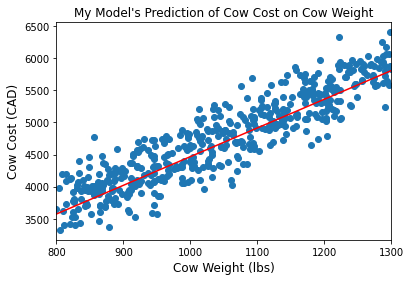

In [ ]:
import torch
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

# Machine Learning Model:
# This is the model that we are defining.
# It will contain parameters that we want to train and
# will define how the equation that the data 
class CowPredictor(torch.nn.Module):
    def __init__(self):
        # The __init__(self) function is where we define parameters for the
        # model. super(Model, self).__init__() helps set up this initialization.
        #
        # Example:
        # self.x = torch.nn.Parameter(torch.tensor(1.0, requires_grad = True))
        # this defines x to be value 1.0
        #
        # This declares a variable "x" that can now be used by the model.

        super(CowPredictor, self).__init__()

        # Your code here:
        self.m = torch.nn.Parameter(torch.tensor(0.5, requires_grad = True))
        self.b = torch.nn.Parameter(torch.tensor(0.0, requires_grad = True))

    def forward(self, cow_weight):
        # __forward__(self, cow_weight) defines the equation you want your
        # data to run through.
        # Here, cow_weight is the input for your model.
        #
        # Example:
        # result = cow_weight * self.x - 10
        # return result
        #
        # This example takes an input, multiplies it by variable "x" defined
        # in __init__(), subtracts 10 and returns the result.
        
        # Your code here:
        cow_cost = self.m * cow_weight + (self.b * 1000)
        
        return cow_cost

#defining the dataset
dataset = read_data("Week1/cow_cost.csv")

#defining the model
my_model = CowPredictor()
my_model.train()

#define our loss function
def MSE_loss(true, predicted):
  return (true - predicted) ** 2

#define optimizer
optim = torch.optim.SGD(my_model.parameters(), lr=1e-7)

#training loop
for epoch in range(10):
  for pair in dataset:
    optim.zero_grad()

    cow_weight = pair[0]
    ground_truth_cow_cost = pair[1]

    predicted_cow_cost = my_model(cow_weight)

    loss = MSE_loss(ground_truth_cow_cost, predicted_cow_cost)

    loss.backward()
    optim.step()

display_data(dataset, my_model.m, my_model.b)

my_model.eval()

small_cow_cost = my_model(small_cow)
medium_cow_cost = my_model(medium_cow)
large_cow_cost = my_model(large_cow)

print("Small Cow Cost: ", small_cow_cost)
print("Medium Cow Cost: ", medium_cow_cost)
print("Large Cow Cost: ", large_cow_cost)